In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn import metrics


/home/rithwik/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_data = pd.read_csv('../Preprocessed Data/cleaned_dataset_train.csv')
v_data = pd.read_csv('../Preprocessed Data/cleaned_dataset_verification.csv')
test_data = pd.read_csv('../Preprocessed Data/cleaned_dataset_test.csv')

In [3]:
def word_list(data,thresh):
    lst = []
    d={}
    for i in data:
        
        
        if type(i)==type('asd'):
            
            for j in i.split():
                
                if j in d:
                    d[j]+=1
                else:
                    d[j]=1
                    
    for i in d:
        if d[i]>thresh:
            lst.append(i)
            
    return list(set(lst))


def return_vector(data,lst):
    k = len(data)
    new_data = np.zeros((len(data),len(lst)))
    for  i in range(len(data)):
        
        if type(data[i])==type('abc'):
            for j in data[i].split():
                if j in lst:
                    pos = lst.index(j)
                    new_data[i,pos] = 1
                    
    return new_data
            
    

In [4]:
lst = word_list(train_data['comment'],1)


In [5]:
#train_data

In [6]:
def find_principle_components(data,n_components):
    cov = np.matmul(data.T,data)
    return cov

In [7]:
train_vector = return_vector(train_data['comment'],lst)
validation_vector = return_vector(v_data['comment'],lst)
test_vector = return_vector(test_data['comment'],lst)

In [8]:
#vals = find_principle_components(train_vector,100)

In [9]:
train_y = train_data['insult']
test_y = test_data['insult']
v_y = v_data['insult']

In [10]:
model = Sequential()
model.add(Dense(100,input_shape=(len(lst),)))
model.add(Dense(10))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [12]:
model.load_weights("80%acc.h5")

In [13]:
#history = model.fit(train_vector,train_y,epochs=50,validation_data=[validation_vector,v_y],batch_size=40)

In [14]:
train_pred = model.predict(train_vector)
test_pred = model.predict(test_vector)
v_pred = model.predict(validation_vector)

In [15]:
metrics.roc_auc_score(test_y,test_pred)

0.8459540573153674

In [16]:
train_pred = np.where(train_pred>.5,1,0)
test_pred = np.where(test_pred>.5,1,0)
v_pred = np.where(v_pred>.5,1,0)

In [17]:
train_acc = accuracy_score(train_y,train_pred)
test_acc = accuracy_score(test_y,test_pred)
v_acc = accuracy_score(v_y,v_pred)

In [18]:
train_acc,test_acc,v_acc

(0.9460349632632379, 0.8186626369474878, 0.6809843400447427)

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               826700    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 827,721
Trainable params: 827,721
Non-trainable params: 0
_________________________________________________________________


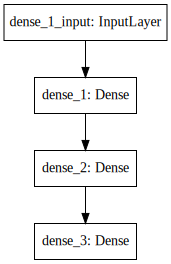

In [31]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               826700    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 827,721
Trainable params: 827,721
Non-trainable params: 0
_________________________________________________________________
